<a href="https://colab.research.google.com/github/sudama-inc/EDA-with-Pandas-and-Numpy/blob/main/practice_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Iterate for a row over every entry
2.   find null values
3.   remove null values
4.   apply specific conditions to one or more rows
5.   Data Types in pandas Do different operation & Modify every Dtypes
6.   add / mult int col to object / category / string
7.   add / mult into int columns
8.   add / mult str to str columns
9.   work on time stamp objects in data frames
10.  convert the column dtypes
11.  Plot different type of graphs and understand the graphs

## dtypes in pandas & numpy

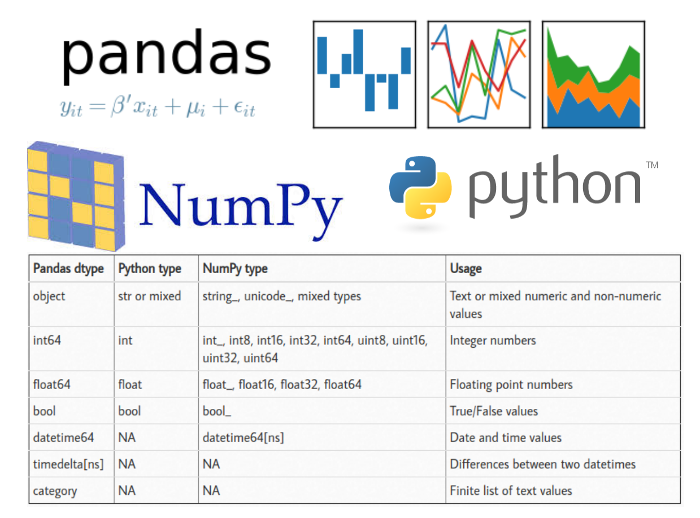

DataFrame.plot(*args, **kwargs)
---
---
kind
---
---



1.   ‘line’ : line plot (default)
1.   ‘bar’ : vertical bar plot
1.   ‘barh’ : horizontal bar plot
2.   ‘hist’ : histogram
2.   ‘box’ : boxplot
2.   ‘kde’ : Kernel Density Estimation plot
1.   ‘area’ : area plot
1.   ‘pie’ : pie plot
1.   ‘scatter’ : scatter plot (DataFrame only)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'a':	[110,110, 110,110,120], 'b': [1.2, 2.1, 3.3, 4.2,5.8], 'c':['a','b','c','d', 'a'],	'd': [True, True, False, False, True], 'e':['10:30:00','11:00:00','11:30:00','12:00:00','12:30:00']})
df


,a,b,c,d,e
0,110,1.2,a,True,10:30:00
1,110,2.1,b,True,11:00:00
2,110,3.3,c,False,11:30:00
3,110,4.2,d,False,12:00:00
4,120,5.8,a,True,12:30:00


Axes(0.22375,0.11;0.5775x0.77)


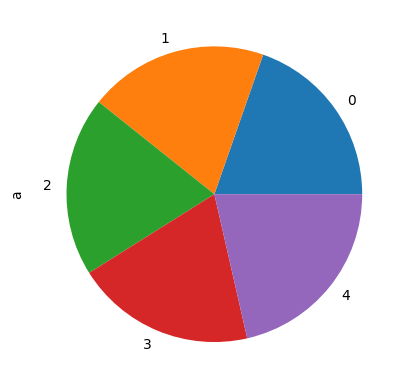

In [3]:
print(df['a'].plot(kind='pie'))

Axes(0.125,0.11;0.775x0.77)


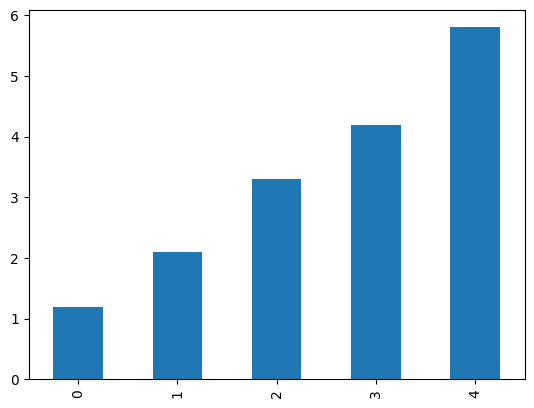

In [4]:
print(df['b'].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


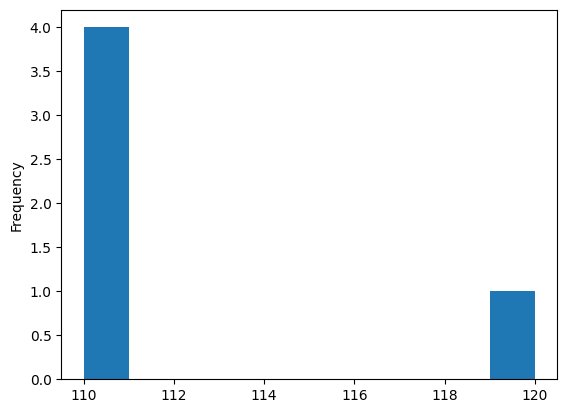

In [5]:
print(df['a'].plot(kind='hist'))

Axes(0.125,0.11;0.775x0.77)


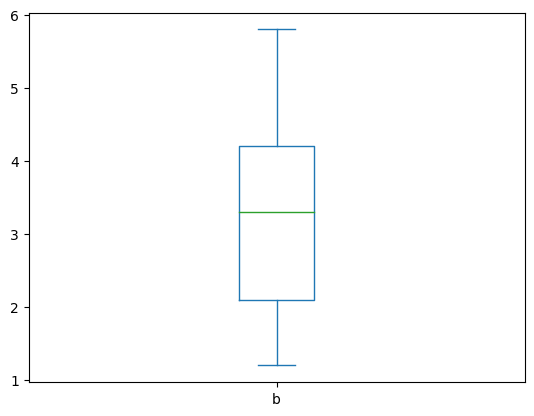

In [6]:
print(df['b'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


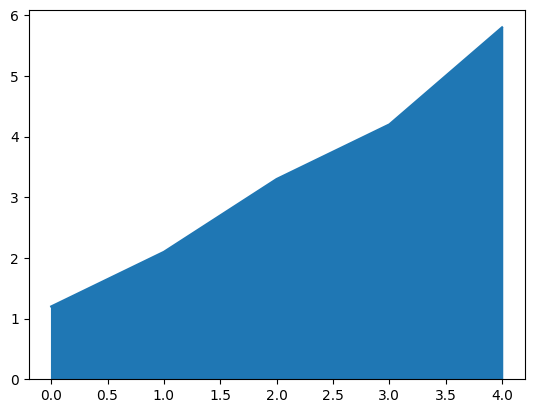

In [7]:
print(df['b'].plot(kind='area'))

Axes(0.125,0.11;0.775x0.77)


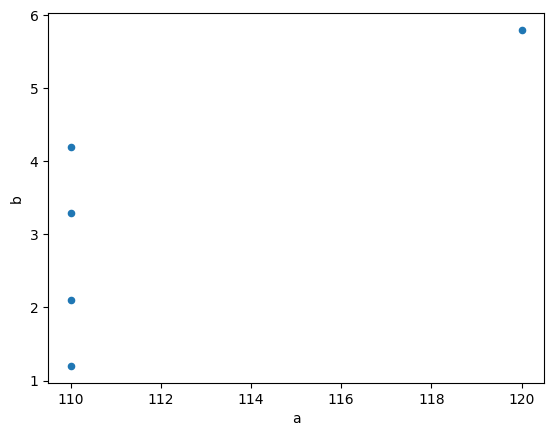

In [8]:
print(df.plot(x='a', y='b', kind='scatter'))

In [9]:
# Convert 'e' column into timestamp object
df['e'] = pd.to_datetime(df['e'])

In [10]:
# create a new column and shift the date with 1
df['f'] = df['e'].shift(-1)
df

,a,b,c,d,e,f
0,110,1.2,a,True,2023-07-29 10:30:00,2023-07-29 11:00:00
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00
4,120,5.8,a,True,2023-07-29 12:30:00,NaT


In [11]:
# get the f - e
df['f-e'] = df.f-df.e

df

,a,b,c,d,e,f,f-e
0,110,1.2,a,True,2023-07-29 10:30:00,2023-07-29 11:00:00,0 days 00:30:00
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00,0 days 00:30:00
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00,0 days 00:30:00
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00,0 days 00:30:00
4,120,5.8,a,True,2023-07-29 12:30:00,NaT,NaT


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   a       5 non-null      int64          
 1   b       5 non-null      float64        
 2   c       5 non-null      object         
 3   d       5 non-null      bool           
 4   e       5 non-null      datetime64[ns] 
 5   f       4 non-null      datetime64[ns] 
 6   f-e     4 non-null      timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 373.0+ bytes
None


In [13]:
print(df.dtypes)
print('\n')

print('Print the Dtypes: ')
print(type(df.dtypes))

a                int64
b              float64
c               object
d                 bool
e       datetime64[ns]
f       datetime64[ns]
f-e    timedelta64[ns]
dtype: object


Print the Dtypes: 
<class 'pandas.core.series.Series'>


In [14]:
series_dtype = pd.Series(df.dtypes)
print(list(series_dtype))
print(series_dtype.to_list())

[dtype('int64'), dtype('float64'), dtype('O'), dtype('bool'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<m8[ns]')]
[dtype('int64'), dtype('float64'), dtype('O'), dtype('bool'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<m8[ns]')]


## Pandas Concatnation Operations on different dtypes
1.   str + str
1.   str + int
2.   str + category
2.   str + objects
1.   str + dateTime
2.   int + float
1.   dateTime + dateTime
1.   bool + bool
1.   bool + int
1.   bool + float
1.   bool + str
2.   bool + dateTime
1.   category + category

In [15]:
# 1. str + str
df['g'] = df['c']+df['c']

In [16]:
# 2. str + int
df['h'] = df['c']+df['a'].astype('str')

In [17]:
# 3. str + category --> Can't perform Concatnation
# 4. str + objects
df['i'] = df['c'].astype('str') + df['c'].astype('category').astype('str')
df['j'] = df['c'].astype('str') + df['c'].astype('object')

In [18]:
# 5. str + dateTime
df['k'] = df['c'].astype('str') + df['e'].astype('str')

In [19]:
# 6. int + float
df['l'] = df['a']+df['b']

In [20]:
# 7. dateTime + dateTime --> Can't perform the operation
# df['m'] = df['e']+df['f']


In [21]:
# 8. bool + bool
# 9. bool + int
# 10. bool + float
df['n'] = df['d']+df['d']
df['o'] = df['d']+df['a']
df['p'] = df['d']+df['b']
df

,a,b,c,d,e,f,f-e,g,h,i,j,k,l,n,o,p
0,110,1.2,a,True,2023-07-29 10:30:00,2023-07-29 11:00:00,0 days 00:30:00,aa,a110,aa,aa,a2023-07-29 10:30:00,111.2,True,111,2.2
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00,0 days 00:30:00,bb,b110,bb,bb,b2023-07-29 11:00:00,112.1,True,111,3.1
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00,0 days 00:30:00,cc,c110,cc,cc,c2023-07-29 11:30:00,113.3,False,110,3.3
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00,0 days 00:30:00,dd,d110,dd,dd,d2023-07-29 12:00:00,114.2,False,110,4.2
4,120,5.8,a,True,2023-07-29 12:30:00,NaT,NaT,aa,a120,aa,aa,a2023-07-29 12:30:00,125.8,True,121,6.8


In [22]:
# 11. bool + str --> Can't perform the operation
# 12. bool + dateTime
# df['q'] = df['d']+df['c']
df['q'] = df['d']+df['e']

In [23]:
# 13. category + category --> Can't perform the operation
# df['r'] = df['c'].astype('category')+df['c'].astype('category')

In [24]:
# Get the items where A is greater then 3
df_greater_3 = df[(df['b']>2) & (df['b']<=4.5)]
df_greater_3

,a,b,c,d,e,f,f-e,g,h,i,j,k,l,n,o,p,q
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00,0 days 00:30:00,bb,b110,bb,bb,b2023-07-29 11:00:00,112.1,True,111,3.1,2023-07-29 11:00:00.000000001
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00,0 days 00:30:00,cc,c110,cc,cc,c2023-07-29 11:30:00,113.3,False,110,3.3,2023-07-29 11:30:00.000000000
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00,0 days 00:30:00,dd,d110,dd,dd,d2023-07-29 12:00:00,114.2,False,110,4.2,2023-07-29 12:00:00.000000000


In [25]:
# find null values
df.isna().sum()

a      0
b      0
c      0
d      0
e      0
f      1
f-e    1
g      0
h      0
i      0
j      0
k      0
l      0
n      0
o      0
p      0
q      0
dtype: int64

In [26]:
# remove null values
df_not_null = df.dropna()
df_not_null

,a,b,c,d,e,f,f-e,g,h,i,j,k,l,n,o,p,q
0,110,1.2,a,True,2023-07-29 10:30:00,2023-07-29 11:00:00,0 days 00:30:00,aa,a110,aa,aa,a2023-07-29 10:30:00,111.2,True,111,2.2,2023-07-29 10:30:00.000000001
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00,0 days 00:30:00,bb,b110,bb,bb,b2023-07-29 11:00:00,112.1,True,111,3.1,2023-07-29 11:00:00.000000001
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00,0 days 00:30:00,cc,c110,cc,cc,c2023-07-29 11:30:00,113.3,False,110,3.3,2023-07-29 11:30:00.000000000
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00,0 days 00:30:00,dd,d110,dd,dd,d2023-07-29 12:00:00,114.2,False,110,4.2,2023-07-29 12:00:00.000000000


In [27]:
# apply specific conditions to one or more rows
df['r'] = df['a']+df['b']**2
df

,a,b,c,d,e,f,f-e,g,h,i,j,k,l,n,o,p,q,r
0,110,1.2,a,True,2023-07-29 10:30:00,2023-07-29 11:00:00,0 days 00:30:00,aa,a110,aa,aa,a2023-07-29 10:30:00,111.2,True,111,2.2,2023-07-29 10:30:00.000000001,111.44
1,110,2.1,b,True,2023-07-29 11:00:00,2023-07-29 11:30:00,0 days 00:30:00,bb,b110,bb,bb,b2023-07-29 11:00:00,112.1,True,111,3.1,2023-07-29 11:00:00.000000001,114.41
2,110,3.3,c,False,2023-07-29 11:30:00,2023-07-29 12:00:00,0 days 00:30:00,cc,c110,cc,cc,c2023-07-29 11:30:00,113.3,False,110,3.3,2023-07-29 11:30:00.000000000,120.89
3,110,4.2,d,False,2023-07-29 12:00:00,2023-07-29 12:30:00,0 days 00:30:00,dd,d110,dd,dd,d2023-07-29 12:00:00,114.2,False,110,4.2,2023-07-29 12:00:00.000000000,127.64
4,120,5.8,a,True,2023-07-29 12:30:00,NaT,NaT,aa,a120,aa,aa,a2023-07-29 12:30:00,125.8,True,121,6.8,2023-07-29 12:30:00.000000001,153.64


Import DataFrame

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
app = pd.read_csv('/content/drive/MyDrive/Datasets/application_data.csv')
prev_app = pd.read_csv("/content/drive/MyDrive/Datasets/previous_application.csv")

In [30]:
print(app.columns)
print(len(app.columns.to_list()))

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
122


In [31]:
print(app.shape)
print(type(app.shape))

(307511, 122)
<class 'tuple'>


In [32]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [33]:
# Check which cloumns belongs to which data types
app.info()

# But here .info() is not working so, in this case what we will do
# So how to which column is of which data type in pandas

# Solution
# Check the data types of each column
data_types = app.dtypes

print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [34]:
app.dtypes[app.dtypes == 'int64'].index.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [35]:
# Get the unique dtypes of all the columns

data_types.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [36]:
# Get the all datatype of columns saperatly into the list like:
# int64 is in a particular list & object is in particular list

print(data_types[data_types == 'int64'])
print('Get the shape: ')
print(data_types[data_types == 'int64'].shape)
print('Get the index of the Series: ')
print(data_types[data_types == 'int64'].index)
print('Get the list of Int64 columns: ')
print(data_types[data_types == 'int64'].index.to_list())

print('Get the list of float64 columns: ')
print(data_types[data_types == 'float64'].index.to_list())

print('Get the list of O columns: ')
print(data_types[data_types == 'O'].index.to_list())

SK_ID_CURR                     int64
TARGET                         int64
CNT_CHILDREN                   int64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
FLAG_EMP_PHONE                 int64
FLAG_WORK_PHONE                int64
FLAG_CONT_MOBILE               int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
REGION_RATING_CLIENT           int64
REGION_RATING_CLIENT_W_CITY    int64
HOUR_APPR_PROCESS_START        int64
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
FLAG_DOCUMENT_2                int64
FLAG_DOCUMENT_3                int64
FLAG_DOCUMENT_4                int64
FLAG_DOCUMENT_5                int64
FLAG_DOCUMENT_6                int64
FLAG_DOCUMENT_7                int64
F

In [37]:
type(app.isnull().sum())

pandas.core.series.Series

In [38]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'}, inplace=True)

In [39]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100
msng_info.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [40]:
# get the col_name into the list where msng_pct >= 40
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()

In [41]:
app_msng_rmvd = app.drop(labels=msng_col, axis=1)
app_msng_rmvd.shape

(307511, 73)

In [42]:
# Get the list of columns which are starting with FLAG

flag_col = []
for col in app_msng_rmvd.columns:
  if col.startswith('FLAG_'):
    flag_col.append(col)
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [43]:
len(flag_col)

28

In [44]:
# Add the Target column from the app_msng_rmvd data frame
flag_tgt_col = app_msng_rmvd[flag_col + ['TARGET']]
flag_tgt_col.head(2)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


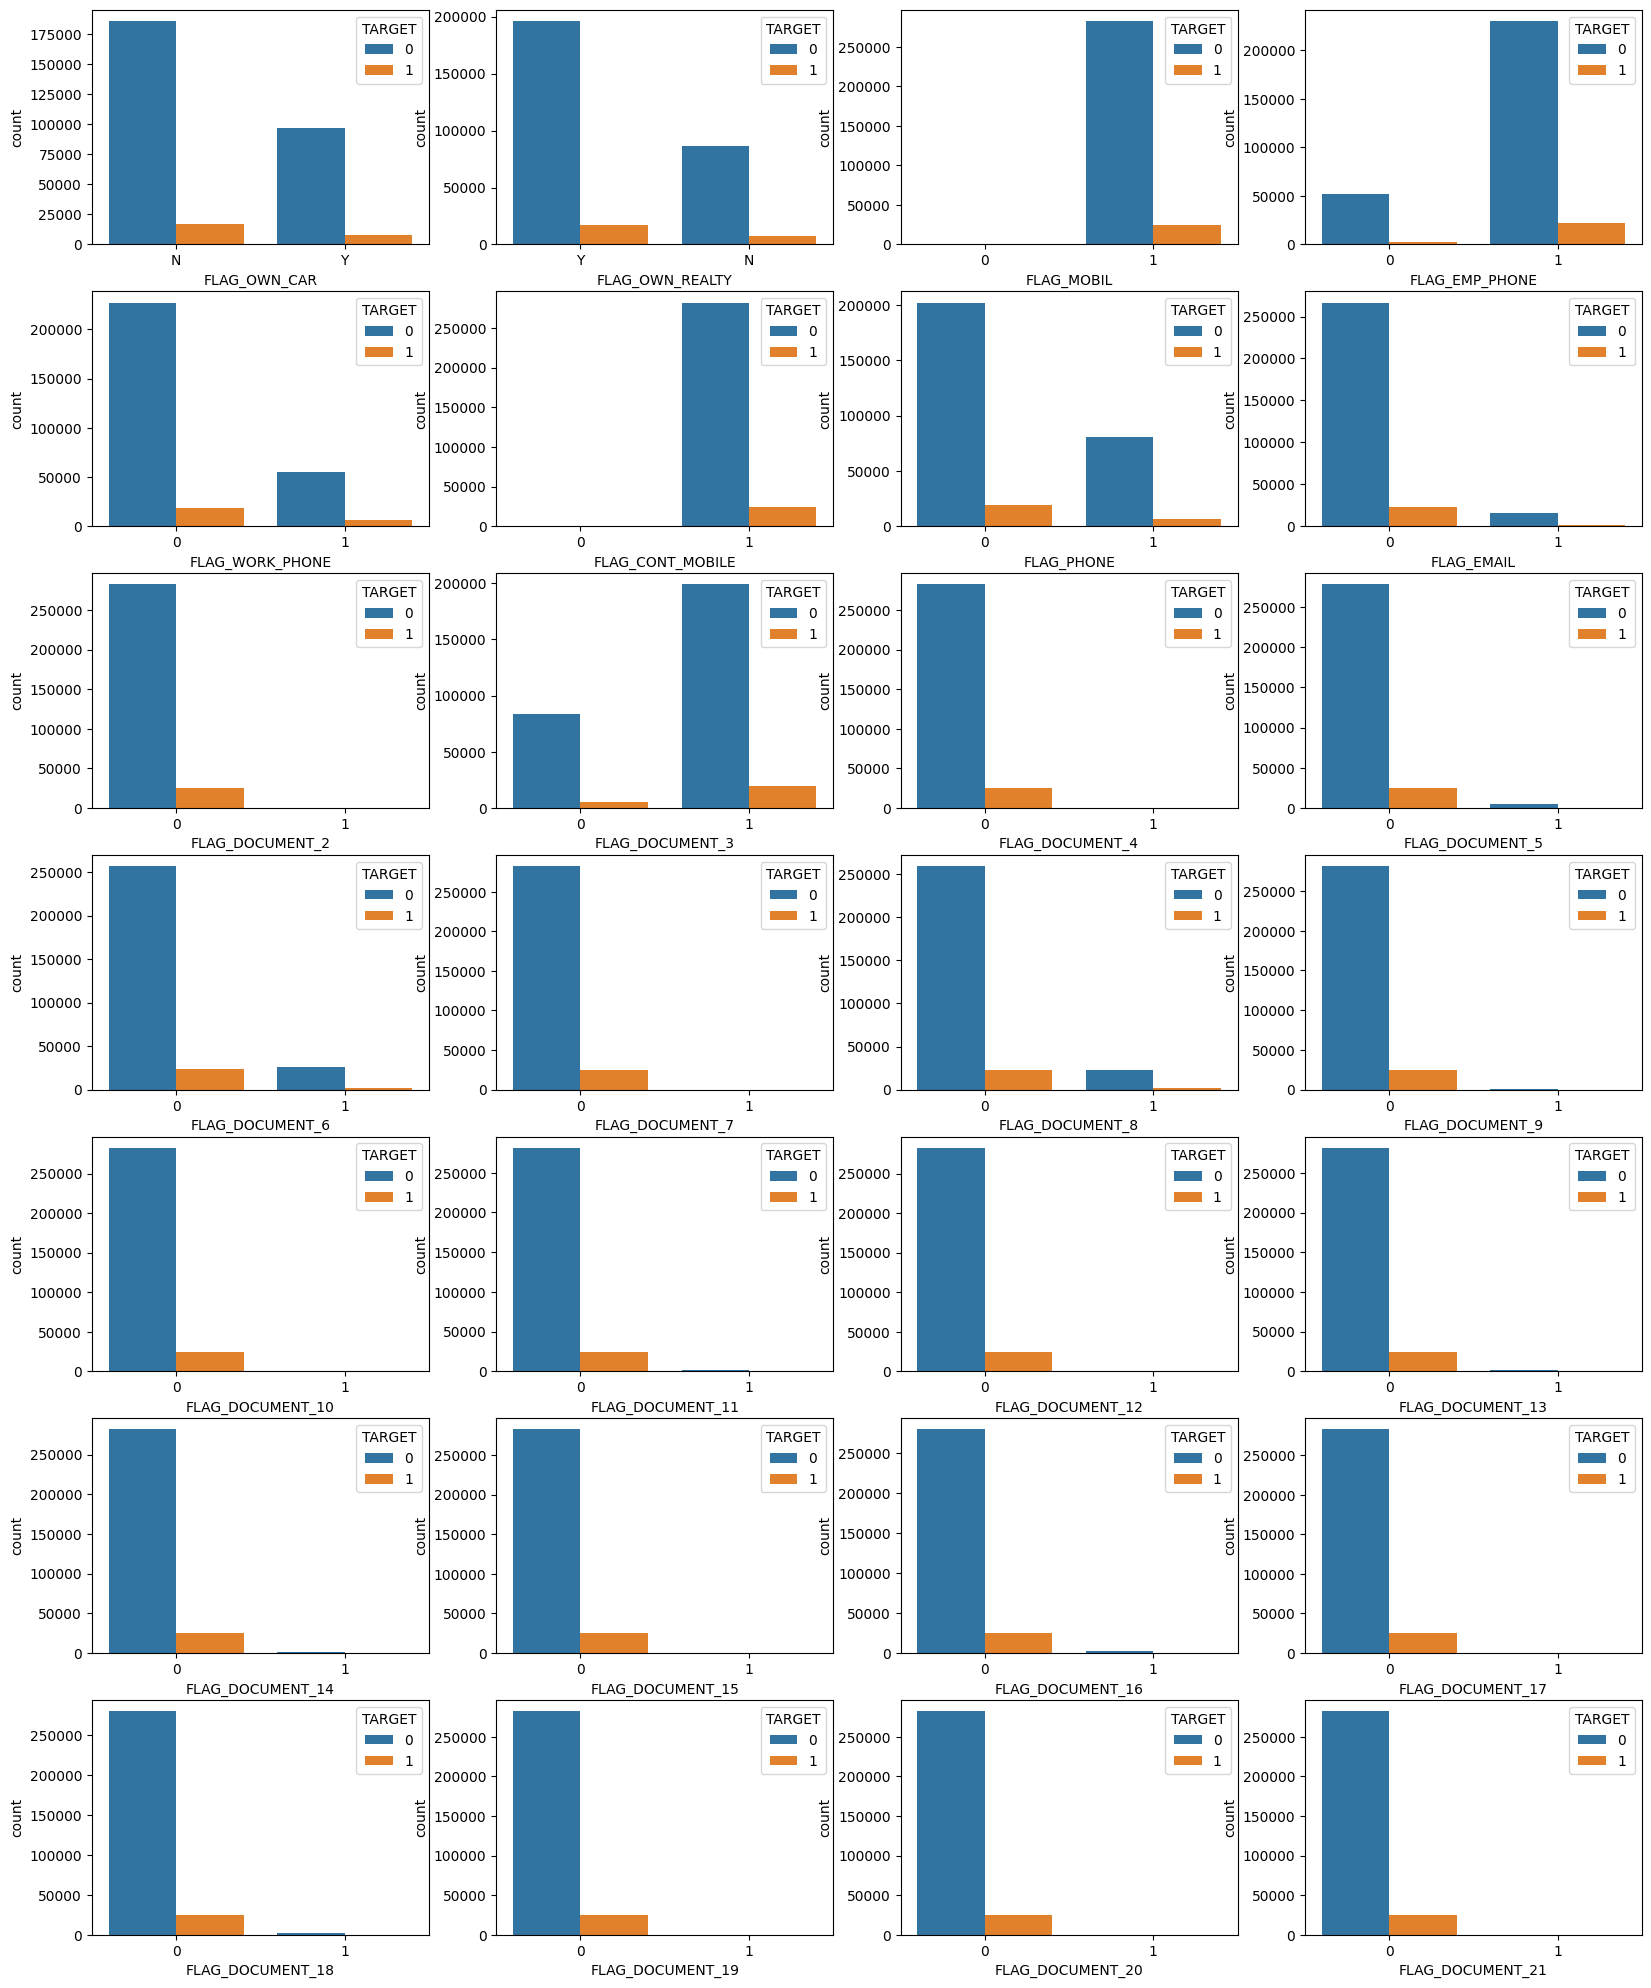

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))

for i, col in enumerate(flag_col):
  plt.subplot(7,4,i+1)
  sns.countplot(data=flag_tgt_col, x=col, hue='TARGET')

In [47]:
app_msng_rmvd.shape

(307511, 73)

In [48]:
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']

flg_corr_df = app_msng_rmvd[flg_corr]

In [49]:
flg_corr_df.shape

(307511, 9)

In [50]:
# Get the unique value counts with GroupBy & size()
print(flg_corr_df.groupby(['FLAG_OWN_CAR']).size())

# Get the unique value counts with value_counts()
print('unique value counts with value_counts(): ')
print(flg_corr_df['FLAG_OWN_CAR'].value_counts())

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64
unique value counts with value_counts(): 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


In [51]:
# Find the correlation between the features
corr_df = round(flg_corr_df.corr(), 2)
corr_df

<ipython-input-51-ab662b5e6c7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = round(flg_corr_df.corr(), 2)


,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,-0.0,1.00,0.23,-0.01,-0.02,0.06,0.05
FLAG_WORK_PHONE,0.0,0.23,1.00,0.02,0.29,-0.01,0.03
FLAG_CONT_MOBILE,-0.0,-0.01,0.02,1.00,0.01,-0.01,0.00
FLAG_PHONE,0.0,-0.02,0.29,0.01,1.00,0.01,-0.02
FLAG_EMAIL,0.0,0.06,-0.01,-0.01,0.01,1.00,-0.00
TARGET,0.0,0.05,0.03,0.00,-0.02,-0.00,1.00


<Axes: >

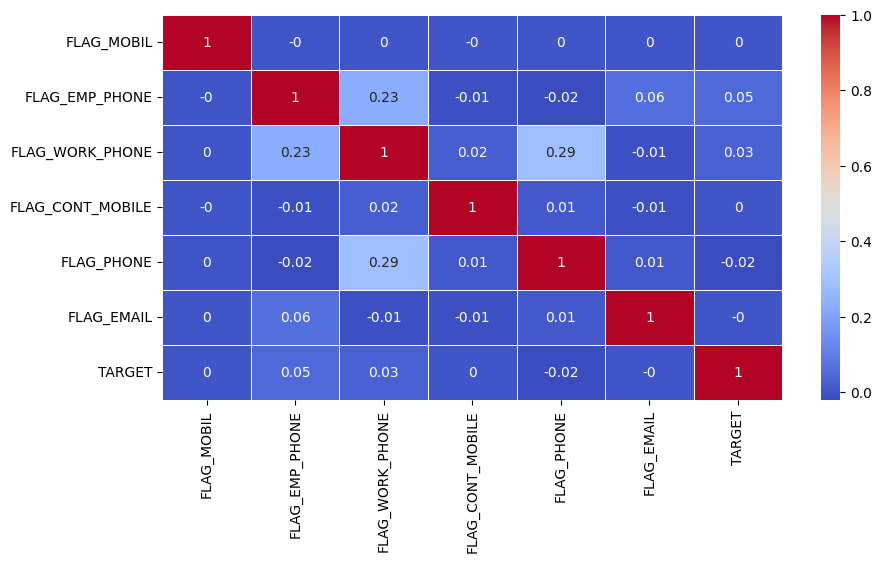

In [52]:
# Create a correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, cmap='coolwarm', linewidth=0.5, annot=True)

In [53]:
app_flg_rmvd = app_msng_rmvd.drop(labels=flag_col, axis=1)
app_flg_rmvd.shape

(307511, 45)

<Axes: >

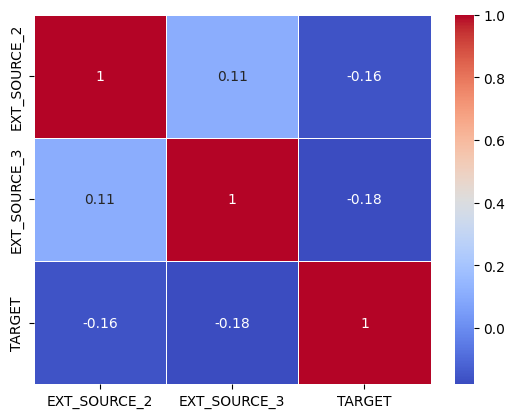

In [54]:
sns.heatmap(data=round(app_flg_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(), 2),cmap='coolwarm', linewidth=.5, annot=True)

In [55]:
app_score_col_rmvd = app_flg_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)
app_score_col_rmvd.shape

(307511, 43)

In [56]:
app_score_col_rmvd.isnull().sum().sort_values() / app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [57]:
# Fill the null values with Mode
app_score_col_rmvd['CNT_FAMMEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0]))

In [58]:
# Get the total null values
app_score_col_rmvd['CNT_FAMMEMBERS'].isnull().sum()

0